# Setup

Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [2]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Data import

In [3]:
airline_data = pd.read_csv("data/test.csv")
airline_data.head(6)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied


# Data Cleanup

In [4]:
columns_to_drop = ['Unnamed: 0', 'id']
airline_data = airline_data.drop(columns=columns_to_drop, axis=1)
airline_data.head(6)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied


I dropped unecessary colomns such as id and numeric-index

In [5]:
print(airline_data.shape)
print(airline_data.dtypes)

(25976, 23)
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float6

In [6]:
airline_data.isnull().values.any()

True

In [7]:
airline_data.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

Over here, I can see that there are some null values for Arrival delay in minutes. Normally we would remove all null rows, but intuition suggests that null might equal to 0 or no delay. So, I performed a data check, but after checking the data, it was found that there are indeed some values where 0 was written. Therefore Null does not necessarily equal 0. Therefore, since kaggle does not have the right data information provided, those rows with null values, needs to be dropped.

In [8]:
airline_data = airline_data.dropna(subset=['Arrival Delay in Minutes'])
airline_data.isnull().values.any()

False

The data is now clean, now I will divide the features and the label, in different data-frames, to be used later

In [9]:
airline_features = airline_data.iloc[:,0:22] # Independent variables
airline_satisfaction = airline_data['satisfaction'] # Outcome variable
airline_features.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0


In [10]:
airline_satisfaction.head()

0                  satisfied
1                  satisfied
2    neutral or dissatisfied
3                  satisfied
4                  satisfied
Name: satisfaction, dtype: object

The data has been cleaned now

# Test Case

Before any kind of data analysis & feature selection, I will create an original KNN model and test it to check its accuracy. This would act as the control to be measured against for future ml model improvements. This model was only tested with numeric values

In [11]:
columns_to_drop = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
temp_airline_NumOnly = airline_features.drop(columns=columns_to_drop, axis=1)

# Split into train-test partition
X_train, X_test, y_train, y_test = train_test_split(temp_airline_NumOnly, airline_satisfaction, test_size = 0.30, random_state = 500)

# Create scaling object
scaler = StandardScaler()

# Fit scaling object with training data
scaler.fit(X_train)

# Transform both train and test partitions by applying scaling
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

KNNclassifier = KNeighborsClassifier(n_neighbors=3) #Vary neighbors=5..20 and check accuracy
KNNmodel = KNNclassifier.fit(X_train, y_train)
y_pred = KNNmodel.predict(X_test)
print("Accuracy KNN:", accuracy_score(y_test, y_pred) *100)

Accuracy KNN: 89.49536560247168


In [12]:
print(confusion_matrix(y_test, y_pred))

[[4021  324]
 [ 492 2931]]


# Exploratory Data Analysis

The central goal for EDA would be to examine the overall dataset and perform feature reduction and data inspection, to build a clean model. To perform this, I will follow the following steps, in this order to get the best result:

## Analysis for Target

<Axes: xlabel='satisfaction', ylabel='count'>

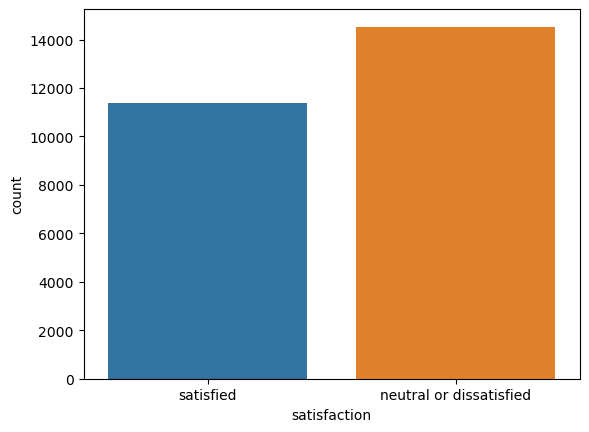

In [13]:
sns.countplot(x='satisfaction', data=airline_data)

This plot reveals that the final outcome variable of satisfaction is almost equally distributed. Therefore, no new false dummy value creation of sorts is required

## Univariate Analysis

Goal: I will examine each feature individually to understand its distribution, variability, and potential for feature reduction.

### "Continuous Numerical Features" Data Analysis

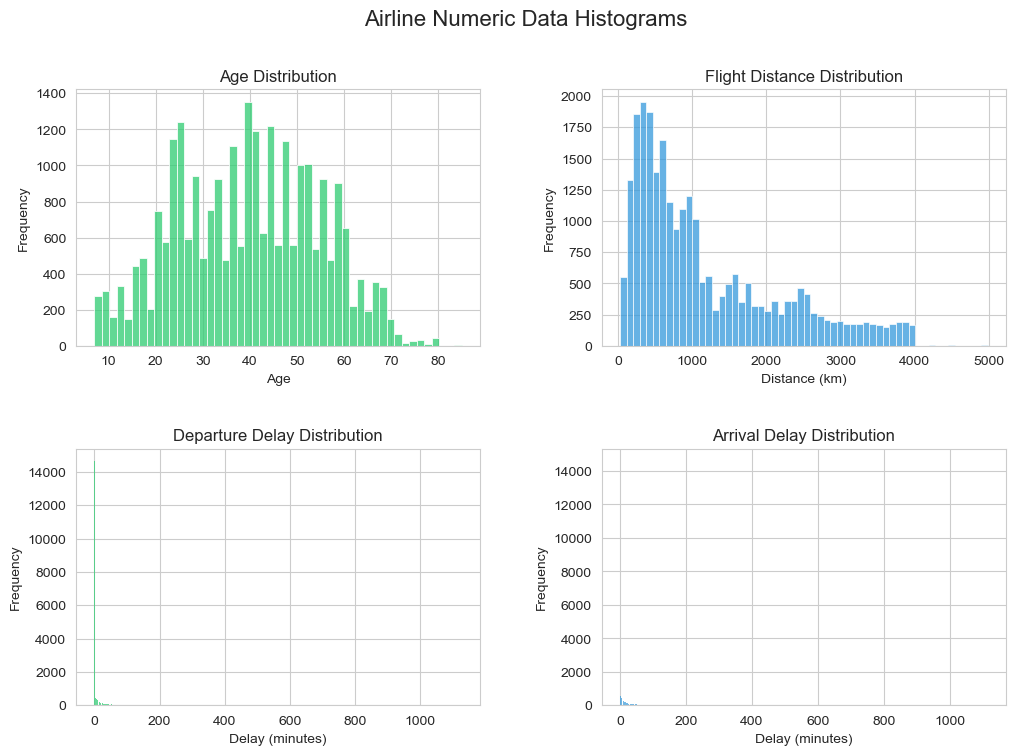

In [14]:
# Set a more visually appealing theme
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

sns.histplot(airline_data['Age'], color='#2ecc71', fill=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(airline_data['Flight Distance'], color='#3498db', fill=True, ax=axes[0, 1])
axes[0, 1].set_title('Flight Distance Distribution')
axes[0, 1].set_xlabel('Distance (km)')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(airline_data['Departure Delay in Minutes'], color='#2ecc71', fill=True, ax=axes[1, 0])
axes[1, 0].set_title('Departure Delay Distribution')
axes[1, 0].set_xlabel('Delay (minutes)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(airline_data['Arrival Delay in Minutes'], color='#3498db', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Arrival Delay Distribution')
axes[1, 1].set_xlabel('Delay (minutes)')
axes[1, 1].set_ylabel('Frequency')

fig.suptitle('Airline Numeric Data Histograms', fontsize=16)

# Show the plot
plt.show()


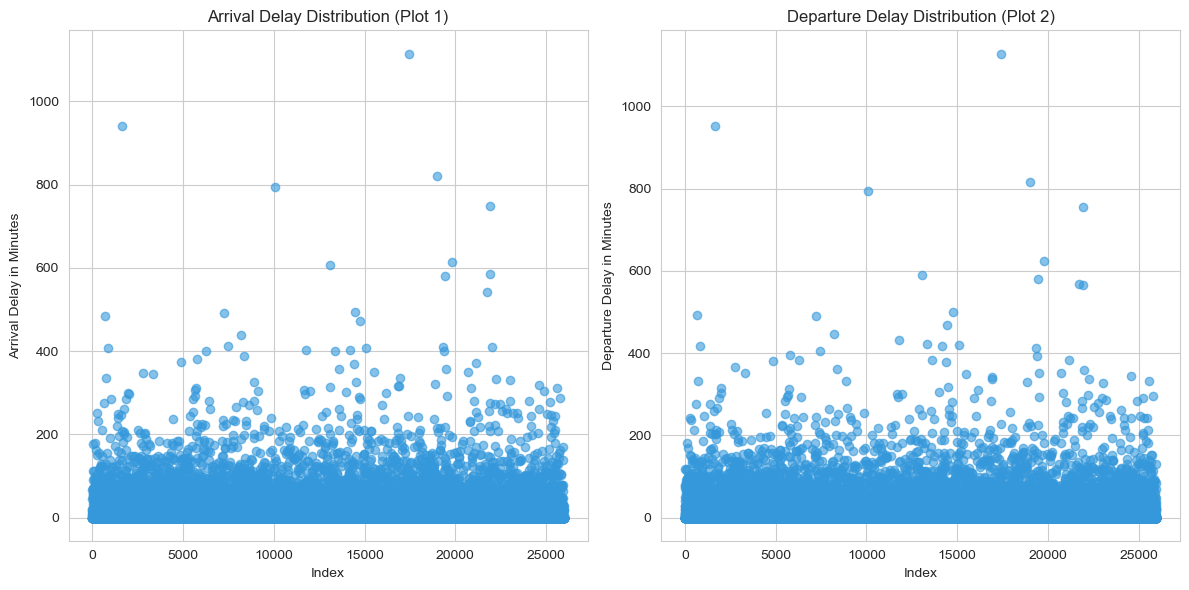

In [15]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Use axes[0] and axes[1] to call scatter on each subplot
axes[0].scatter(x=airline_data.index, y=airline_data['Arrival Delay in Minutes'], color='#3498db', alpha=0.6)
axes[0].set_title('Arrival Delay Distribution (Plot 1)')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Arrival Delay in Minutes')

axes[1].scatter(x=airline_data.index, y=airline_data['Departure Delay in Minutes'], color='#3498db', alpha=0.6)
axes[1].set_title('Departure Delay Distribution (Plot 2)')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Departure Delay in Minutes')

# Adjust spacing between the plots
plt.tight_layout()

# Show the plot
plt.show()


### "Discrete Numerical Features" Data Analysis

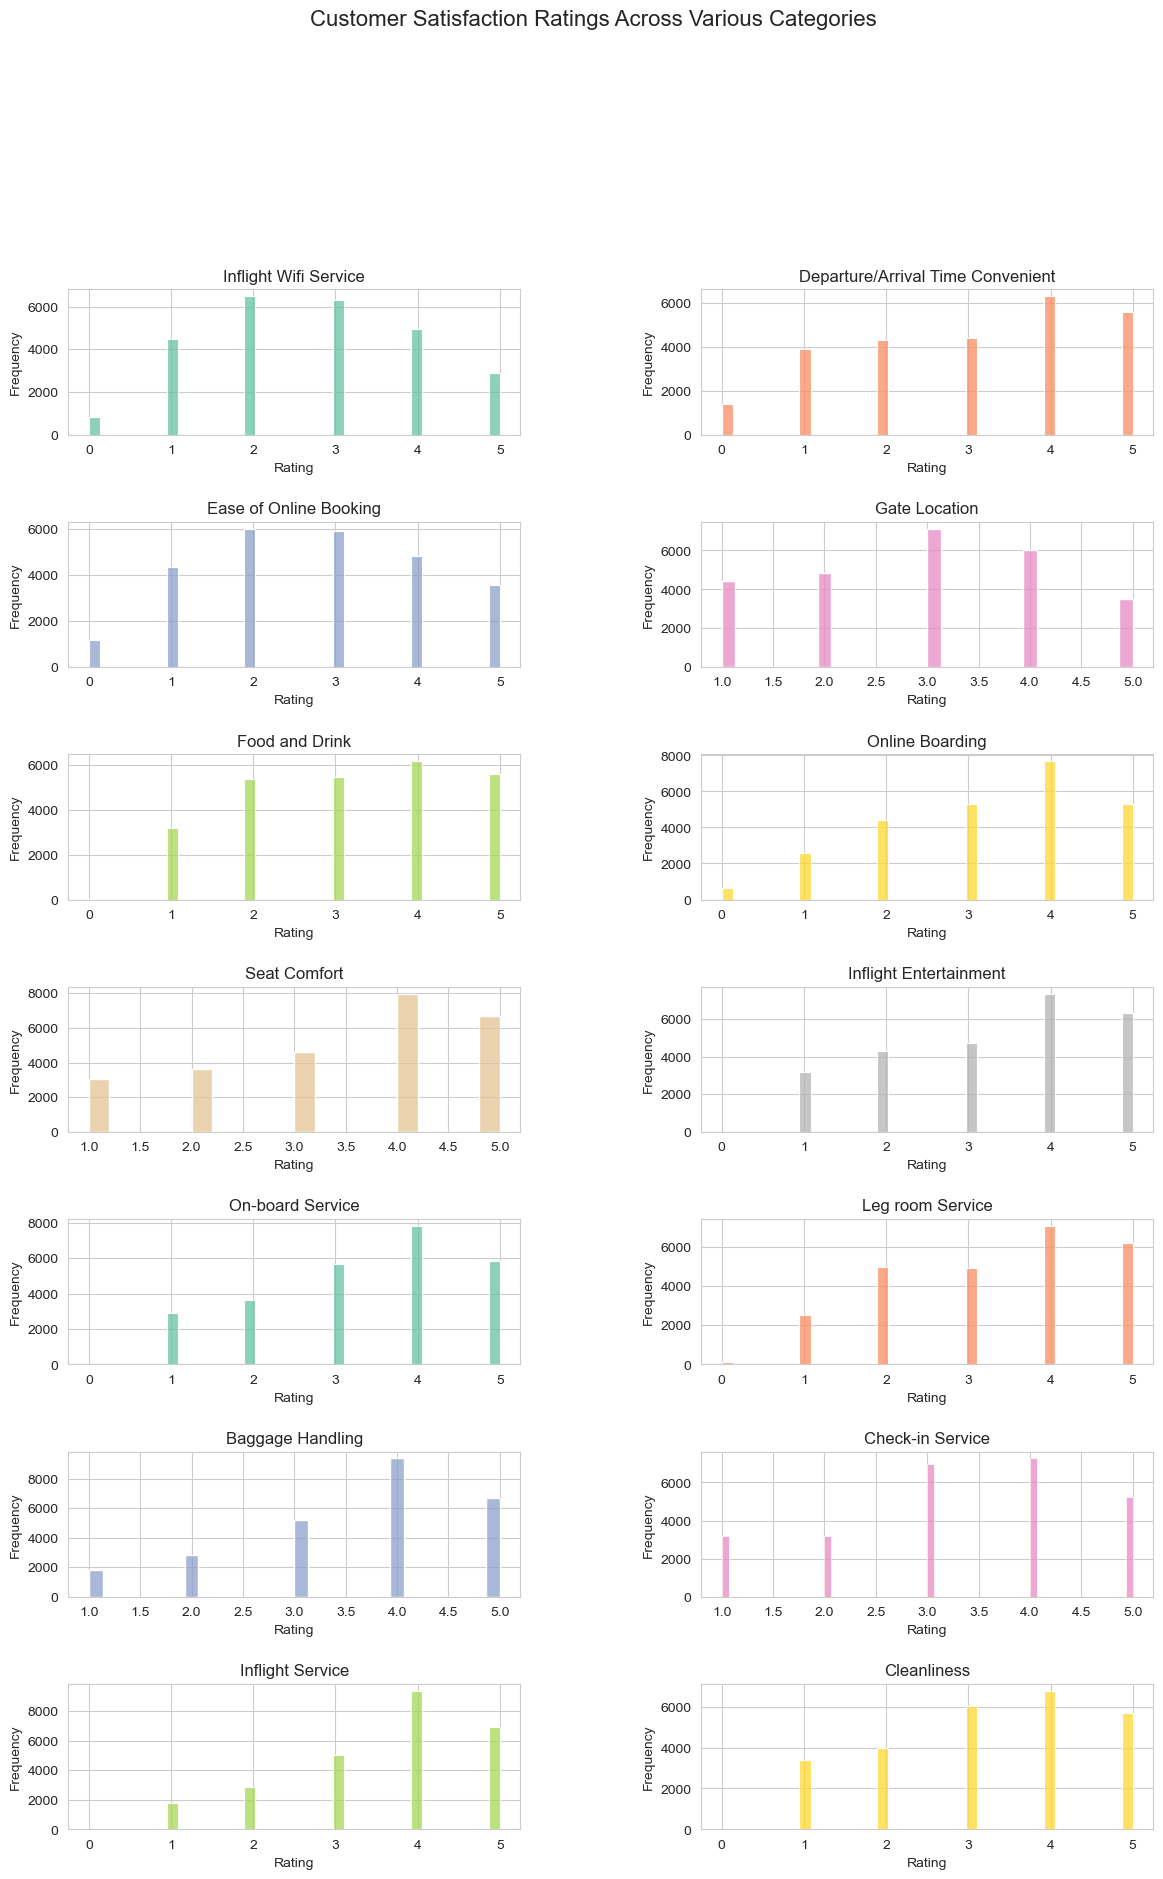

In [16]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 20))
plt.subplots_adjust(hspace=0.6, wspace=0.4)
palette = sns.color_palette("Set2")

# List of attributes to plot and their titles
attributes = [
    ('Inflight wifi service', 'Inflight Wifi Service'),
    ('Departure/Arrival time convenient', 'Departure/Arrival Time Convenient'),
    ('Ease of Online booking', 'Ease of Online Booking'),
    ('Gate location', 'Gate Location'),
    ('Food and drink', 'Food and Drink'),
    ('Online boarding', 'Online Boarding'),
    ('Seat comfort', 'Seat Comfort'),
    ('Inflight entertainment', 'Inflight Entertainment'),
    ('On-board service', 'On-board Service'),
    ('Leg room service', 'Leg room Service'),
    ('Baggage handling', 'Baggage Handling'),
    ('Checkin service', 'Check-in Service'),
    ('Inflight service', 'Inflight Service'),
    ('Cleanliness', 'Cleanliness')
]

# Loop through each attribute and corresponding axis to plot
for i, (attr, title) in enumerate(attributes):
    row = i // 2
    col = i % 2
    sns.histplot(airline_data[attr], color=palette[i % len(palette)], fill=True, ax=axes[row][col])
    axes[row][col].set_title(title)
    axes[row][col].set_xlabel('Rating')
    axes[row][col].set_ylabel('Frequency')

fig.suptitle('Customer Satisfaction Ratings Across Various Categories', fontsize=16, y=1.02)
plt.show()

## Multivariate Analysis

Goal: This part of the analysis includes looking at the correlation between multiple variables, so that I may remove some, to prevent over-fitting

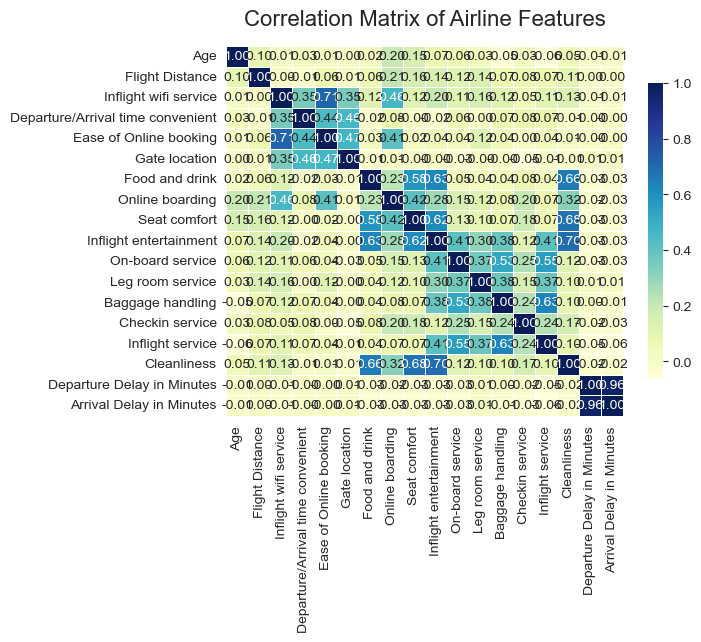

In [18]:


sns.heatmap(airline_features.corr(), 
            cmap="YlGnBu",                # Colormap for vibrant colors
            annot=True,                   # Annotate with correlation values
            fmt=".2f",                    # Format values to 2 decimal places
            linewidths=0.5,               # Add space between cells
            annot_kws={"size": 10},       # Set annotation font size
            cbar_kws={"shrink": 0.8})     # Shrink color bar for better fit

plt.title('Correlation Matrix of Airline Features', fontsize=16, pad=15)
plt.show()


Based on the analysis, in a sandbox enviornment, these values were looked into and started dropping for feature selection. 

## Sandbox Testing of Each variable with the correlation pairs

Departure Delay Statistics by Satisfaction Level:
neutral or dissatisfied: Mean: 16.0, Median: 0.0, Q1: 0.0, Q3: 15.0
satisfied: Mean: 12.0, Median: 0.0, Q1: 0.0, Q3: 9.0

Arrival Delay Statistics by Satisfaction Level:
neutral or dissatisfied: Mean: 16.8, Median: 0.0, Q1: 0.0, Q3: 16.0
satisfied: Mean: 12.2, Median: 0.0, Q1: 0.0, Q3: 8.0


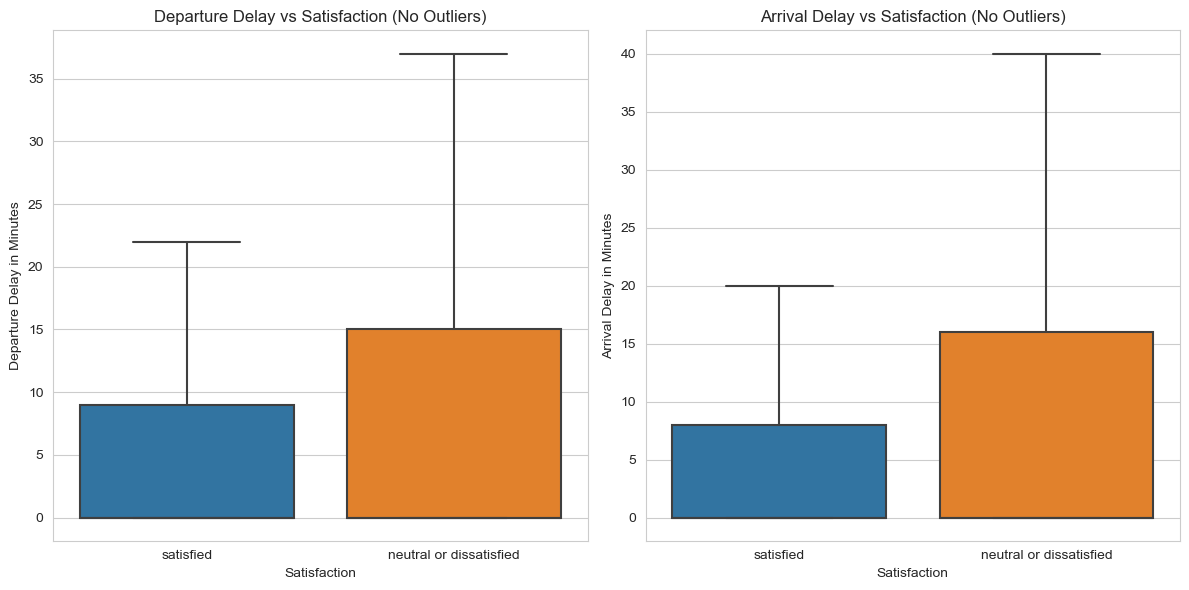

In [19]:
#Outliers have been removed for visual ease of interpretation, as it was observed that majority of the outliers were clustered for lower values.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot for Departure Delay vs Satisfaction without outliers
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=airline_data, ax=axes[0], showfliers=False)
axes[0].set_title('Departure Delay vs Satisfaction (No Outliers)')
axes[0].set_xlabel('Satisfaction')
axes[0].set_ylabel('Departure Delay in Minutes')

# Calculate statistics for Departure Delay
dep_delay_stats = airline_data.groupby('satisfaction')['Departure Delay in Minutes'].describe()

# Print statistics to console
print("Departure Delay Statistics by Satisfaction Level:")
for satisfaction, stats in dep_delay_stats.iterrows():
    print(f"{satisfaction}: Mean: {stats['mean']:.1f}, Median: {stats['50%']:.1f}, Q1: {stats['25%']:.1f}, Q3: {stats['75%']:.1f}")

# Boxplot for Arrival Delay vs Satisfaction without outliers
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=airline_data, ax=axes[1], showfliers=False)
axes[1].set_title('Arrival Delay vs Satisfaction (No Outliers)')
axes[1].set_xlabel('Satisfaction')
axes[1].set_ylabel('Arrival Delay in Minutes')

# Calculate statistics for Arrival Delay
arr_delay_stats = airline_data.groupby('satisfaction')['Arrival Delay in Minutes'].describe()

# Print statistics to console
print("\nArrival Delay Statistics by Satisfaction Level:")
for satisfaction, stats in arr_delay_stats.iterrows():
    print(f"{satisfaction}: Mean: {stats['mean']:.1f}, Median: {stats['50%']:.1f}, Q1: {stats['25%']:.1f}, Q3: {stats['75%']:.1f}")

# Show the plots
plt.tight_layout()
plt.show()


Analysis: Both of them seem to be of similar distribution and have similar impact on satisfaction. Therefore, either can be chosen. As Arrival delay tends to have slightly lesser outliers, that was chosen for the model. Chosen variable: "Arrival Delay in Minutes"

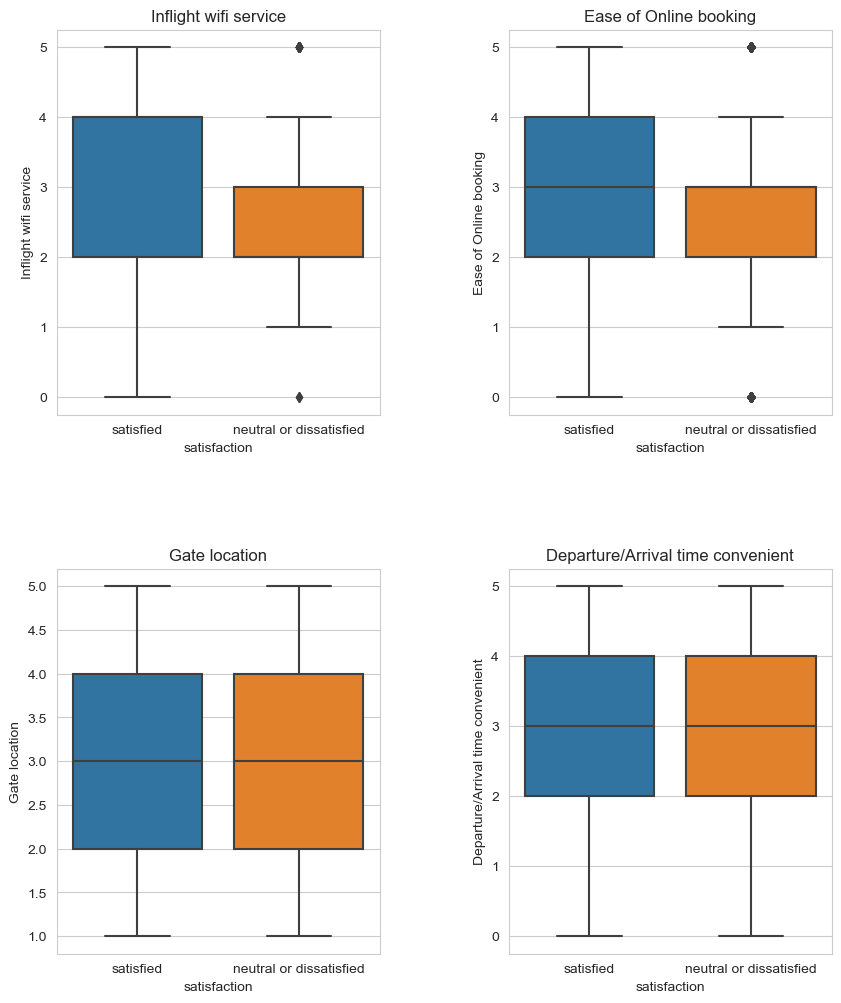

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.boxplot(x='satisfaction', y='Inflight wifi service', data=airline_data, ax=axes[0][0])
axes[0][0].set_title('Inflight wifi service')

sns.boxplot(x='satisfaction', y='Ease of Online booking', data=airline_data, ax=axes[0][1]) 
axes[0][1].set_title('Ease of Online booking')

sns.boxplot(x='satisfaction', y='Gate location', data=airline_data, ax=axes[1][0]) 
axes[1][0].set_title('Gate location')

sns.boxplot(x='satisfaction', y='Departure/Arrival time convenient', data=airline_data, ax=axes[1][1]) 
axes[1][1].set_title('Departure/Arrival time convenient')


plt.show()

Based on the plots, I could see that "Ease of online booking" and "In flight wifi service" are better predicters as they have different distribution of values for satisifed vs disatisified. For example for both of them, people who are neutral or disatisfied have voted primarily between 2-3. While people who are satisified have a range form 2-4, and an even greater spread across all values. Therefore both of them were chosen and kept. While the other two were dropped.

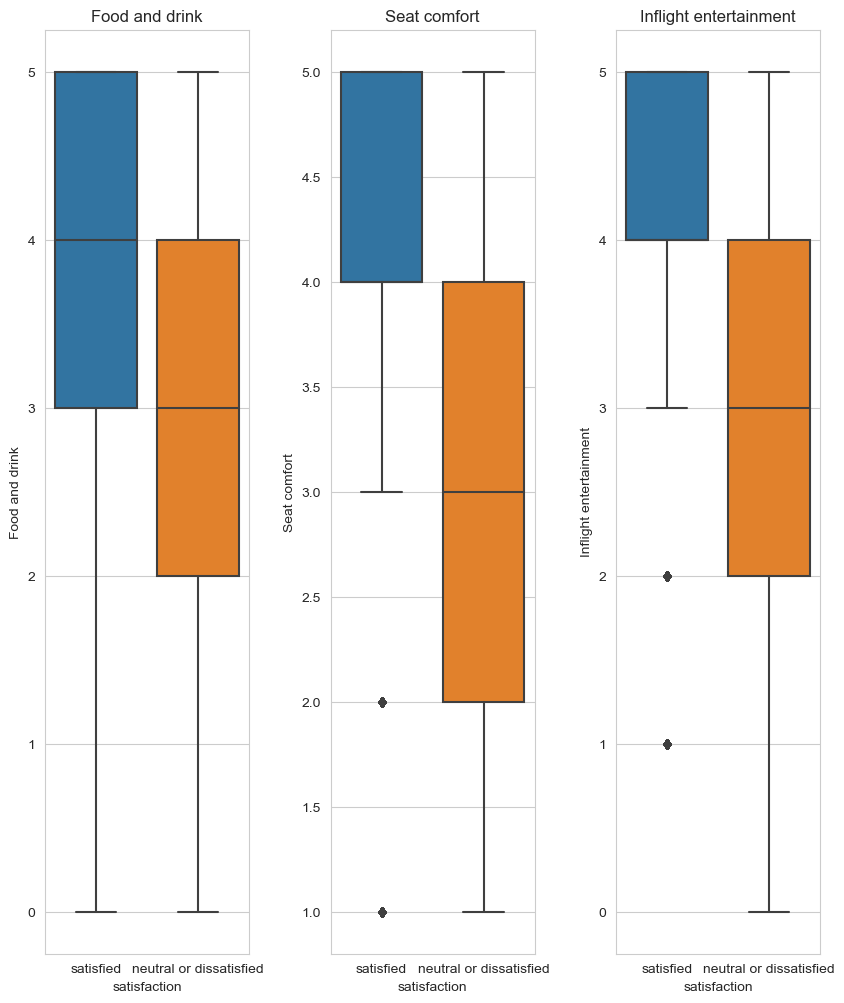

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.boxplot(x='satisfaction', y='Food and drink', data=airline_data, ax=axes[0])
axes[0].set_title('Food and drink')

sns.boxplot(x='satisfaction', y='Seat comfort', data=airline_data, ax=axes[1]) 
axes[1].set_title('Seat comfort')

sns.boxplot(x='satisfaction', y='Inflight entertainment', data=airline_data, ax=axes[2]) 
axes[2].set_title('Inflight entertainment')

plt.show()

The first element dropped out of the following is "food and drink", as compared to the other two variables, it is not the most strongest predictor, as the distribution for disatisfied and satisfied is similar. The other two were kept.

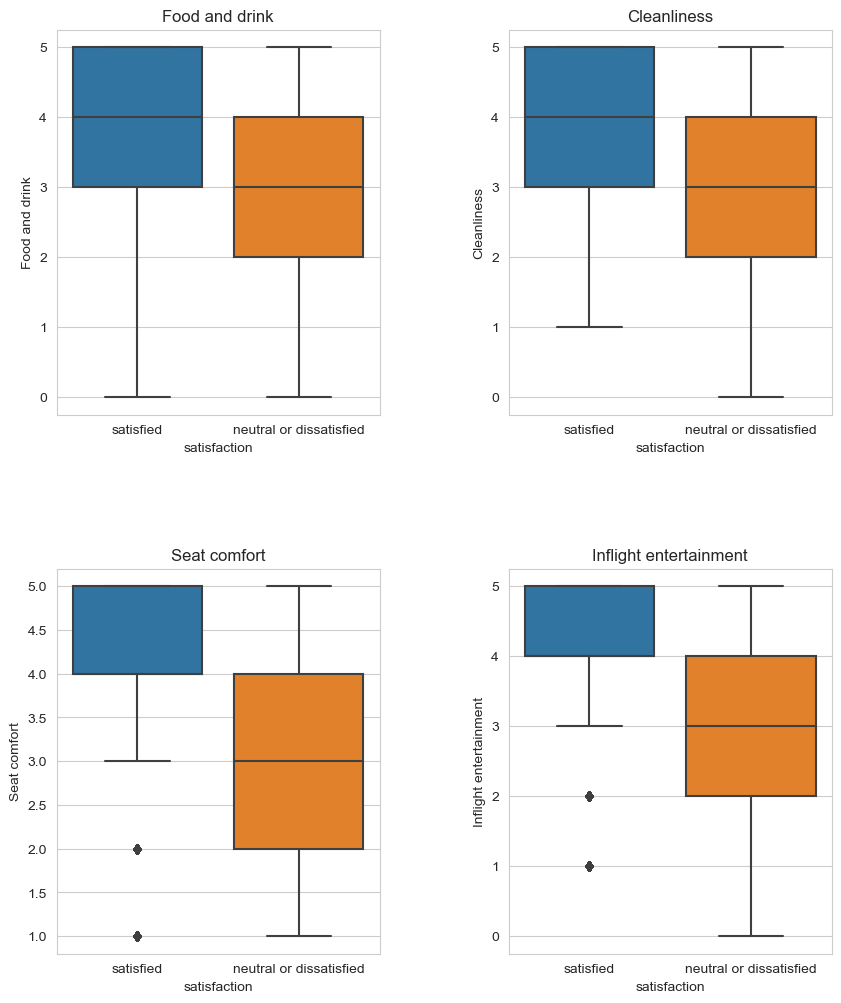

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.boxplot(x='satisfaction', y='Food and drink', data=airline_data, ax=axes[0][0])
axes[0][0].set_title('Food and drink')

sns.boxplot(x='satisfaction', y='Cleanliness', data=airline_data, ax=axes[0][1]) 
axes[0][1].set_title('Cleanliness')

sns.boxplot(x='satisfaction', y='Seat comfort', data=airline_data, ax=axes[1][0]) 
axes[1][0].set_title('Seat comfort')

sns.boxplot(x='satisfaction', y='Inflight entertainment', data=airline_data, ax=axes[1][1]) 
axes[1][1].set_title('Inflight entertainment')


plt.show()

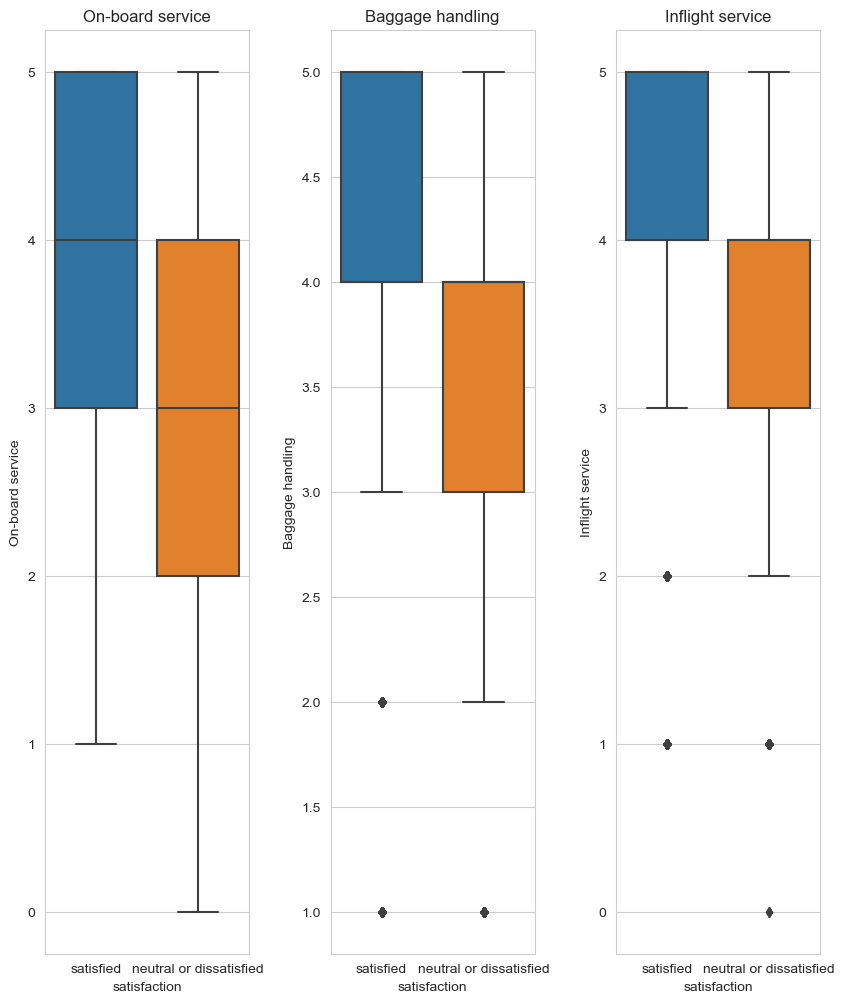

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.boxplot(x='satisfaction', y='On-board service', data=airline_data, ax=axes[0])
axes[0].set_title('On-board service')

sns.boxplot(x='satisfaction', y='Baggage handling', data=airline_data, ax=axes[1]) 
axes[1].set_title('Baggage handling')

sns.boxplot(x='satisfaction', y='Inflight service', data=airline_data, ax=axes[2]) 
axes[2].set_title('Inflight service')

plt.show()

In [24]:
columns_to_drop = ['Departure Delay in Minutes', 'Gate location', 'Departure/Arrival time convenient', 'Food and drink', 'Online boarding', 'Cleanliness', 'Food and drink', 'Seat comfort', 'On-board service', 'Inflight wifi service']
airline_data = airline_data.drop(columns=columns_to_drop, axis=1)
airline_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Ease of Online booking,Inflight entertainment,Leg room service,Baggage handling,Checkin service,Inflight service,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,3,5,5,5,2,5,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,3,4,4,4,3,4,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,2,1,3,2,2,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,1,1,1,3,1,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,4,2,2,2,4,2,20.0,satisfied


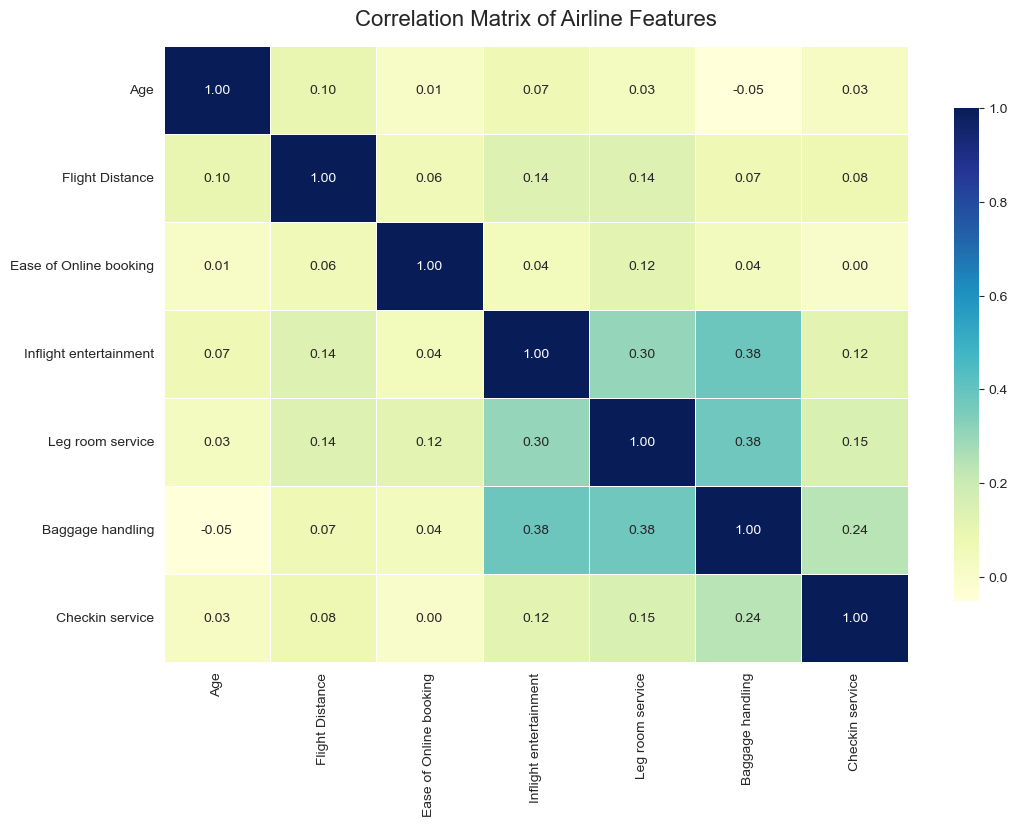

In [25]:
airline_features = airline_data.iloc[:,0:11] # Independent variables

plt.figure(figsize=(12, 8))

sns.heatmap(airline_features.corr(), 
            cmap="YlGnBu",                # Colormap for vibrant colors
            annot=True,                   # Annotate with correlation values
            fmt=".2f",                    # Format values to 2 decimal places
            linewidths=0.5,               # Add space between cells
            annot_kws={"size": 10},       # Set annotation font size
            cbar_kws={"shrink": 0.8})     # Shrink color bar for better fit

plt.title('Correlation Matrix of Airline Features', fontsize=16, pad=15)
plt.show()

## Encoding with Catagorical Values

In [26]:
airline_features_enc = pd.get_dummies(airline_features, drop_first=True)

In [27]:
airline_features_enc.head()

,Age,Flight Distance,Ease of Online booking,Inflight entertainment,Leg room service,Baggage handling,Checkin service,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,52,160,3,5,5,5,2,0,0,0,1,0
1,36,2863,3,4,4,4,3,0,0,0,0,0
2,20,192,2,2,1,3,2,1,1,0,1,0
3,44,3377,0,1,1,1,3,1,0,0,0,0
4,49,1182,4,2,2,2,4,0,0,0,1,0


In [28]:
print(airline_features_enc.shape)
print(airline_features_enc.dtypes)

(25893, 12)
Age                                int64
Flight Distance                    int64
Ease of Online booking             int64
Inflight entertainment             int64
Leg room service                   int64
Baggage handling                   int64
Checkin service                    int64
Gender_Male                        uint8
Customer Type_disloyal Customer    uint8
Type of Travel_Personal Travel     uint8
Class_Eco                          uint8
Class_Eco Plus                     uint8
dtype: object


# Building KNN Model

#### Building the Initial Model

In [29]:
# Split into train-test partition
X_train, X_test, y_train, y_test = train_test_split(airline_features_enc, airline_satisfaction, test_size = 0.20, random_state = 500)

# Create scaling object
scaler = StandardScaler()

# Fit scaling object with training data
scaler.fit(X_train)

# Transform both train and test partitions by applying scaling
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

KNNclassifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan') #Vary neighbors=5..20 and check accuracy
KNNmodel = KNNclassifier.fit(X_train, y_train)
y_pred = KNNmodel.predict(X_test)
print("Accuracy KNN:", accuracy_score(y_test, y_pred) *100)

Accuracy KNN: 88.97470554161035


In [30]:
print(confusion_matrix(y_test, y_pred))

[[2680  218]
 [ 353 1928]]


#### Refining the Model

Highest accuracy: 89.12% with k = 17


<Axes: title={'center': 'Credit Cross-Validation Accuracy Diagram'}, xlabel='Number of Neighbors', ylabel='CV Accuracy of KNN'>

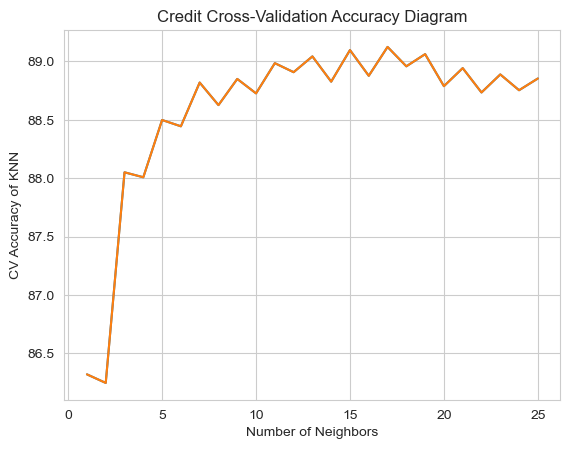

In [31]:
cv_X_train = airline_features_enc
cv_y_train = airline_satisfaction
scaler = StandardScaler()
scaler.fit(cv_X_train)
cv_X_train = scaler.transform(cv_X_train)
lb = preprocessing.LabelBinarizer()
cv_y_train = lb.fit_transform(cv_y_train)
cv_y_train = np.ravel(cv_y_train) # convert to 1d array

# Create elbow diagram
max_k = 25 # Start from 1
k_arr = np.arange(1,max_k+1,1)
acc = np.zeros(max_k)
err = np.zeros(max_k)
for i in range(max_k):
    knum = k_arr[i]
    KNNmodel = KNeighborsClassifier(n_neighbors=knum, metric='manhattan')
    scores = cross_val_score(KNNmodel, cv_X_train, cv_y_train, cv=5, scoring='accuracy')
    acc[i] = scores.mean()*100
    err[i] = 1-acc[i]
    
    
# Find the best k and its corresponding highest accuracy
best_k = k_arr[np.argmax(acc)]  # k with the highest accuracy
best_acc = np.max(acc)  # The highest accuracy

# Print results
print(f"Highest accuracy: {best_acc:.2f}% with k = {best_k}")


fig = plt.figure()
plt.title("Credit Cross-Validation Accuracy Diagram")
plt.xlabel("Number of Neighbors")
plt.ylabel("CV Accuracy of KNN")
plt.plot(k_arr, acc)
sns.lineplot(x=k_arr, y=acc)

#### Building Knn with the best value of K

In [32]:
# Split into train-test partition
X_train, X_test, y_train, y_test = train_test_split(airline_features_enc, airline_satisfaction, test_size = 0.20, random_state = 500)

# Create scaling object
scaler = StandardScaler()

# Fit scaling object with training data
scaler.fit(X_train)

# Transform both train and test partitions by applying scaling
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

KNNclassifier = KNeighborsClassifier(n_neighbors=17, metric='manhattan') #Vary neighbors=5..20 and check accuracy
KNNmodel = KNNclassifier.fit(X_train, y_train)
y_pred = KNNmodel.predict(X_test)
print("Accuracy KNN:", accuracy_score(y_test, y_pred) *100)

Accuracy KNN: 89.34157173199459


Explaination: I have used Manhattan Distance, simply because of the distribution of data. As you could see that for many ratings, based value, the values are between 1 to 5 only. The Manhattan formula, is more sensitive to small value changes rather than eucledian distance, therefore it might be a better measure

In [ ]:
print(confusion_matrix(y_test, y_pred))

#### Further refining model with Grid Search

To be sure, whether or not manhattan distance is the best means of metric, I will again perform a grid search, paired with k-fold cross validation, to find the best combination and potentially further refine my model

In [ ]:
#Parameter range setting for grid search
estimator_KNN = KNeighborsClassifier()
nn_list=list(range(1,25))
print(nn_list)
parameters_KNN = {
    'n_neighbors': nn_list,
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}
print(parameters_KNN)

In [ ]:
from sklearn.model_selection import GridSearchCV # for grid search

# Initiate grid search
cv_X_train = airline_features_enc
cv_y_train = airline_satisfaction
scaler = StandardScaler()
cv_X_train = scaler.fit_transform(cv_X_train)
lb = preprocessing.LabelBinarizer()
cv_y_train = lb.fit_transform(cv_y_train)
cv_y_train = np.ravel(cv_y_train)

grid_search_KNN = GridSearchCV(estimator=estimator_KNN,param_grid=parameters_KNN,scoring = 'accuracy',n_jobs = -1,cv = 10)
KNNGridSearch=grid_search_KNN.fit(cv_X_train, cv_y_train)

In [ ]:
# Results
print(grid_search_KNN.best_params_ ) 
bp = grid_search_KNN.best_params_
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN.best_score_ )

The original intuition was correct, based on the model, Manhattan metrics with 19 neighbours, continues to be the best model

# Gaussian Naive Bayes Model

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(airline_features_enc, airline_satisfaction, test_size=0.20, random_state=23)

# Gaussian Naive Bayes classifier
GNBclassifier = GaussianNB()

# Training with cross-validation on the training set
cv_scores = cross_val_score(GNBclassifier, X_train, y_train, cv=5)  # 5-fold cross-validation

# Fitting the model
GNBmodel = GNBclassifier.fit(X_train, y_train)

# Making predictions on the test set
GNBpreds = GNBmodel.predict(X_test)

# Printing cross-validation accuracy and test accuracy
print(f"Cross-validation training accuracy (mean): {cv_scores.mean() * 100:.2f}%")
print(f"Training accuracy on full training set: {GNBmodel.score(X_train, y_train) * 100:.2f}%")
print(f"Testing accuracy: {accuracy_score(y_test, GNBpreds) * 100:.2f}%")
print(confusion_matrix(y_test, GNBpreds))

# Linear Discrimininant Model

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(airline_features_enc, airline_satisfaction, test_size=0.20, random_state=23)

# Linear Discriminant Analysis (LDA)
LDAmodel = LinearDiscriminantAnalysis()

# Cross-validation for LDA on the training set
cv_scores_lda = cross_val_score(LDAmodel, X_train, y_train, cv=5)

# Fitting the model
LDAmodel.fit(X_train, y_train)

# Making predictions on the test set
LDApreds = LDAmodel.predict(X_test)

# Printing cross-validation accuracy and test accuracy for LDA
print(f"Cross-validation training accuracy (LDA mean): {cv_scores_lda.mean() * 100:.2f}%")
print(f"Training accuracy (LDA) on full training set: {LDAmodel.score(X_train, y_train) * 100:.2f}%")
print(f"Testing accuracy (LDA): {accuracy_score(y_test, LDApreds) * 100:.2f}%")

# Confusion matrix for LDA
print(confusion_matrix(y_test, LDApreds))

# Quadratic Discriminant Model

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


# Quadratic Discriminant Analysis (QDA)
QDAmodel = QuadraticDiscriminantAnalysis()

# Cross-validation for QDA on the training set
cv_scores_qda = cross_val_score(QDAmodel, X_train, y_train, cv=5)

# Fitting the model
QDAmodel.fit(X_train, y_train)

# Making predictions on the test set
QDApreds = QDAmodel.predict(X_test)

# Printing cross-validation accuracy and test accuracy for QDA
print(f"Cross-validation training accuracy (QDA mean): {cv_scores_qda.mean() * 100:.2f}%")
print(f"Training accuracy (QDA) on full training set: {QDAmodel.score(X_train, y_train) * 100:.2f}%")
print(f"Testing accuracy (QDA): {accuracy_score(y_test, QDApreds) * 100:.2f}%")

# Confusion matrix for QDA
print(confusion_matrix(y_test, QDApreds))